<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.067861,73.491761,39.451065,-39.361643,156.649044,180.494027,-23.844983
1,0.0,1.0,62.977945,23.255276,76.518955,-29.414732,143.337444,178.531964,-35.194519
2,0.0,2.0,80.046745,40.020767,84.536114,-9.153506,205.450119,220.539872,-15.089753
3,0.0,3.0,59.649537,43.306292,68.424682,3.234723,184.615234,181.796642,2.818592
4,0.0,4.0,41.756779,25.590321,69.858781,-8.295629,138.910252,151.397344,-12.487092
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.319879,72.839537,72.741565,-41.156795,208.744187,241.018373,-32.274187
29996,999.0,26.0,82.644544,43.111064,71.083895,13.255951,220.095454,202.943289,17.152164
29997,999.0,27.0,64.347549,52.085080,78.861404,8.285153,213.579187,211.061696,2.517491
29998,999.0,28.0,25.789025,78.366113,74.442081,-6.044175,182.553044,207.808658,-25.255614


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.067861,73.491761,39.451065,-39.361643,156.649044,180.494027,-23.844983
1,0.0,1.0,62.977945,23.255276,76.518955,-29.414732,143.337444,178.531964,-35.194519
2,0.0,2.0,80.046745,40.020767,84.536114,-9.153506,205.450119,220.539872,-15.089753
3,0.0,3.0,59.649537,43.306292,68.424682,3.234723,184.615234,181.796642,2.818592
4,0.0,4.0,41.756779,25.590321,69.858781,-8.295629,138.910252,151.397344,-12.487092
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.319879,72.839537,72.741565,-41.156795,208.744187,241.018373,-32.274187
29996,999.0,26.0,82.644544,43.111064,71.083895,13.255951,220.095454,202.943289,17.152164
29997,999.0,27.0,64.347549,52.085080,78.861404,8.285153,213.579187,211.061696,2.517491
29998,999.0,28.0,25.789025,78.366113,74.442081,-6.044175,182.553044,207.808658,-25.255614


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.067861,73.491761,39.451065,-39.361643,156.649044,180.494027,-23.844983
1,0.0,1.0,62.977945,23.255276,76.518955,-29.414732,143.337444,178.531964,-35.194519
2,0.0,2.0,80.046745,40.020767,84.536114,-9.153506,205.450119,220.539872,-15.089753
3,0.0,3.0,59.649537,43.306292,68.424682,3.234723,184.615234,181.796642,2.818592
4,0.0,4.0,41.756779,25.590321,69.858781,-8.295629,138.910252,151.397344,-12.487092
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,94.319879,72.839537,72.741565,-41.156795,208.744187,241.018373,-32.274187
29996,999.0,26.0,82.644544,43.111064,71.083895,13.255951,220.095454,202.943289,17.152164
29997,999.0,27.0,64.347549,52.085080,78.861404,8.285153,213.579187,211.061696,2.517491
29998,999.0,28.0,25.789025,78.366113,74.442081,-6.044175,182.553044,207.808658,-25.255614


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.067861  73.491761  39.451065  ...  156.649044  180.494027 -23.844983
      1.0    62.977945  23.255276  76.518955  ...  143.337444  178.531964 -35.194519
      2.0    80.046745  40.020767  84.536114  ...  205.450119  220.539872 -15.089753
      3.0    59.649537  43.306292  68.424682  ...  184.615234  181.796642   2.818592
      4.0    41.756779  25.590321  69.858781  ...  138.910252  151.397344 -12.487092
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   94.319879  72.839537  72.741565  ...  208.744187  241.018373 -32.274187
      26.0   82.644544  43.111064  71.083895  ...  220.095454  202.943289  17.152164
      27.0   64.347549  52.085080  78.861404  ...  213.579187  211.061696   2.517491
      28.0   25.789025  78.366113  74.442081  ...  182.553044  207.808658 -25.255614
      29.0   57.200300  98.127987  94.735636  ...  322.151868  272.603097  49.548772

[30000 rows x 7 columns]

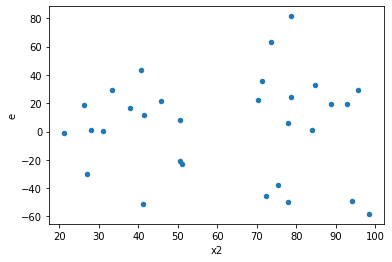

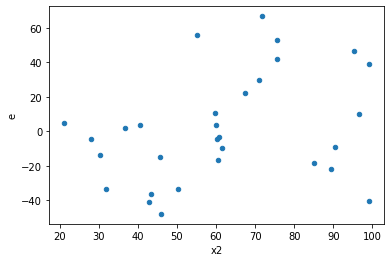

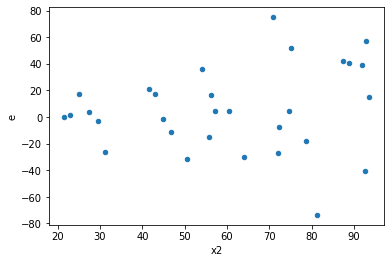

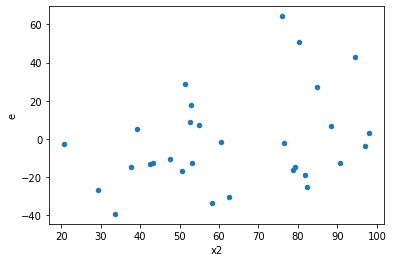

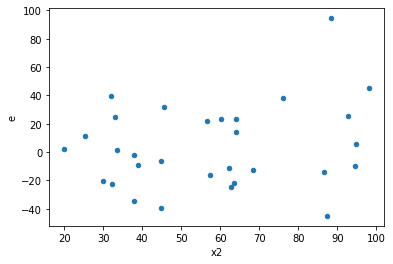

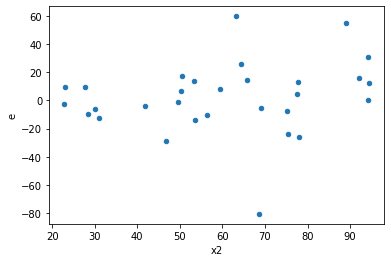

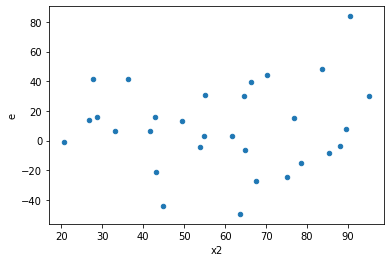

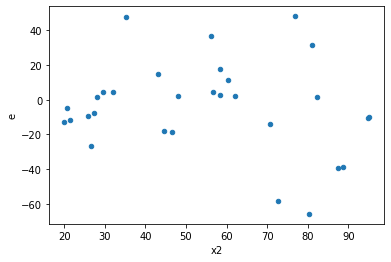

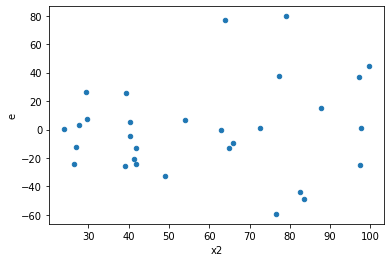

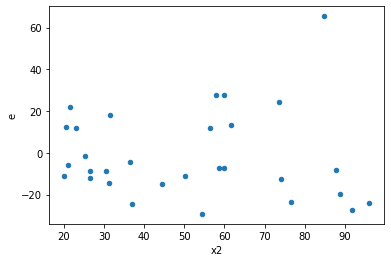

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,2094.6685847484537,5022.263298271446,232.7409538609393,558.029255363494,2.3976410086250297,0.20877757447381917,0.8956112127630904,0.10438878723690959,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,5651.366671943045,19657.89991613145,627.9296302158939,2184.2111017923835,3.478432927335203,0.0773817751550041,0.961309112422498,0.03869088757750205,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,4072.8063833397377,9448.492865123904,452.5340425933042,1049.8325405693226,2.319897381759664,0.22595188223613305,0.8870240588819335,0.11297594111806653,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,1597.1996769897903,19081.090854519833,177.46663077664337,2120.121206057759,11.94659072964601,0.0010433190756331534,0.9994783404621834,0.0005216595378165767,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,2446.611582775253,6688.250116269069,271.84573141947254,743.1389018076743,2.733678759373165,0.1502049671228627,0.9248975164385687,0.07510248356143134,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,2659.5572391683,12290.607090813939,295.5063599075889,1365.6230100904377,4.621298203251859,0.03240423892284516,0.9837978805385774,0.01620211946142258,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,2181.96817450629,11658.864243216423,242.44090827847666,1295.4293603573803,5.343278778964984,0.02009893240429239,0.9899505337978538,0.010049466202146196,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,3119.750111550795,16271.293053971547,346.63890128342166,1807.921450441283,5.215575758368435,0.021794995937276296,0.9891025020313619,0.010897497968638148,Reject005=0 : Heteroscedasticity
9.0,9.0,9.0,5196.891744944244,11992.873320381748,577.432416104916,1332.5414800424164,2.307701200828153,0.22879434184387448,0.8856028290780628,0.11439717092193724,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2094.6685847484537,5022.263298271446,232.7409538609393,558.029255363494,2.3976410086250297,0.20877757447381917,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,5651.366671943045,19657.89991613145,627.9296302158939,2184.2111017923835,3.478432927335203,0.0773817751550041,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,5940.703789167156,5143.051196509701,660.0781987963506,571.4501329455223,0.8657309603431212,0.8334567399570348,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,4072.8063833397377,9448.492865123904,452.5340425933042,1049.8325405693226,2.319897381759664,0.22595188223613305,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,1597.1996769897903,19081.090854519833,177.46663077664337,2120.121206057759,11.94659072964601,0.0010433190756331534,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,2446.611582775253,6688.250116269069,271.84573141947254,743.1389018076743,2.733678759373165,0.1502049671228627,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,2659.5572391683,12290.607090813939,295.5063599075889,1365.6230100904377,4.621298203251859,0.03240423892284516,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,2181.96817450629,11658.864243216423,242.44090827847666,1295.4293603573803,5.343278778964984,0.02009893240429239,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,3119.750111550795,16271.293053971547,346.63890128342166,1807.921450441283,5.215575758368435,0.021794995937276296,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      542
Reject005=0 : Heteroscedasticity    458
Name: Result_test, dtype: int64